In [ ]:
import pandas as pd
import numpy as np
import

In [ ]:
df = pd.read_csv("https://github.com/lucasvitorsr/projeto-taxa-de-suicidio/blob/main/base%20de%20dados/base%20de%20dados%20limpa/dataset_limpo.csv?raw=true")

In [ ]:
df = df[["suicides/100k_pop", "gdp_for_year"]]

In [ ]:
df['gdp_for_year'] = df['gdp_for_year'].str.replace(',', '').astype(float)

In [ ]:
df['gdp_for_year_normalized'] = (df['gdp_for_year'] - df['gdp_for_year'].mean()) / df['gdp_for_year'].std()
df['suicides_normalized'] = (df['suicides/100k_pop'] - df['suicides/100k_pop'].mean()) / df['suicides/100k_pop'].std()

In [ ]:
df.describe()

,suicides/100k_pop,gdp_for_year,gdp_for_year_normalized,suicides_normalized
count,26664.000000,2.666400e+04,2.666400e+04,2.666400e+04
mean,13.036133,4.613603e+11,1.705473e-17,-2.398322e-17
std,19.123598,1.482478e+12,1.000000e+00,1.000000e+00
min,0.000000,4.691962e+07,-3.111772e-01,-6.816779e-01
25%,1.010000,9.836200e+09,-3.045739e-01,-6.288635e-01
50%,6.170000,4.991320e+10,-2.775401e-01,-3.590398e-01
75%,16.860000,2.644673e+11,-1.328134e-01,1.999554e-01
max,224.970000,1.812071e+13,1.191205e+01,1.108232e+01


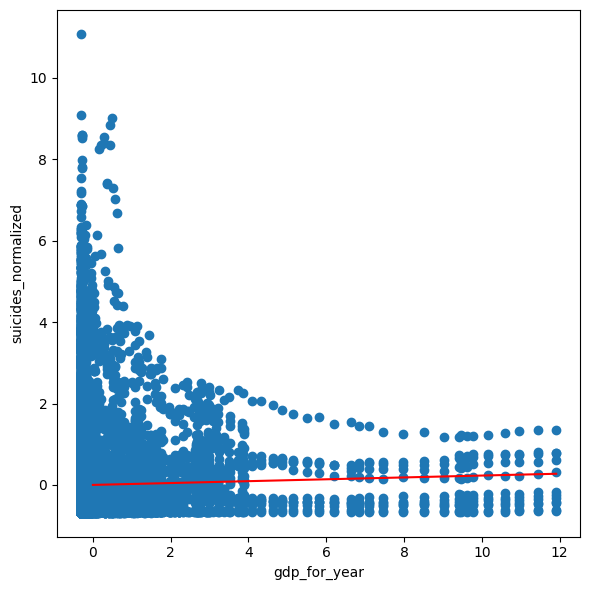

In [ ]:
import scipy.stats as ss
import matplotlib.pyplot as plt

x = df["gdp_for_year_normalized"]
y = df["suicides_normalized"]
r = ss.pearsonr(x, y)[0]
b = r * y.std(ddof=1) / x.std(ddof=1)
a = y.mean() - b * x.mean()

x_ = np.linspace(0, x.max(), 10)
ŷ = b * x_ + a

plt.subplots(figsize=(6, 6))

plt.scatter(x, y)
plt.plot(x_, ŷ, c='red')
plt.xlabel("gdp_for_year")
plt.ylabel("suicides_normalized")
plt.title("")

plt.tight_layout()

In [ ]:
R2 = r**2
print(f"R² = {np.round(R2, 4)}")

R² = 0.0005


Isso nos indica que apenas 0.05% da variabilidade da taxa de suicídio/100kpop pode ser explicada pela variável "gdp_for_year" (produto interno bruto do ano). Em outras palavras, há uma relação muito fraca ou insignificante entre essas duas variáveis.